In [10]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib
from keras.models import Sequential
from keras.layers import Dense
from keras.engine.input_layer import Input
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [11]:
data_path = '../../data/output/normalized_data_X_5p.csv'
y_path = '../../data/output/y_5p.csv'

data = pd.read_csv(data_path)
y = pd.read_csv(y_path)
print(data.shape)
print(y.shape)
data.head()

(69884, 420)
(69884, 1)


,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,alertTypeSB_ACCIDENT,alertTypeSB_CHIT_CHAT,alertTypeSB_HAZARD,alertTypeSB_JAM,alertTypeSB_NORMAL,alertTypeSB_POLICE,alertTypeSB_ROAD_CLOSED,jamBlockTypeSB_-,jamBlockTypeSB_NORMAL,jamBlockTypeSB_ROAD_CLOSED_EVENT
0,0.118068,0.0,0.084945,0.264128,0.439400,0.010487,0.0,0.000006,0.265656,0.439493,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.118068,0.0,0.084965,0.264428,0.443488,0.014304,0.0,0.000009,0.265956,0.444051,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.118068,0.0,0.084972,0.263625,0.448606,0.018030,0.0,0.000010,0.264915,0.448957,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.118068,0.0,0.084979,0.261608,0.458297,0.025182,0.0,0.000014,0.263352,0.456961,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.118068,0.0,0.084985,0.260228,0.463266,0.028953,0.0,0.000000,0.261792,0.463170,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3]:
# FILTERING HIGHER HEADWAYS (2% of the data)
# two_hours = 120
# data = data[data.headway <= two_hours]

In [3]:
target_col = ['headway']
bb_col = ['busBunching']
hd_threshold = ["headwayThreshold"]
features = list(set(list(data.columns))-set(target_col)-set(bb_col)-set(hd_threshold))

In [12]:
# same data of rvm test
data = data[0:1000]
y = y[0:1000]
print(data.shape)
print(y.shape)

(1000, 420)
(1000, 1)


In [13]:
# Making training and test data: 80% Training, 20% Test
random.seed(15) #to get always the same set
train_X, test_X, train_Y, test_Y = train_test_split(data, y, test_size=0.20, random_state=7)

In [4]:
del data
del y

### Artificial Neural Network Model

In [7]:
# Define model - Deep Feed Forward
random.seed(42)

def create_model():

    ann_model = Sequential()
    ann_model.add(Dense(350, input_dim=len(features), activation= "relu"))
    ann_model.add(Dense(350, activation= "relu"))
    ann_model.add(Dense(350, activation= "relu"))
    ann_model.add(Dense(300, activation= "relu"))
    ann_model.add(Dense(300, activation= "relu"))
    ann_model.add(Dense(300, activation= "relu"))
    ann_model.add(Dense(250, activation= "relu"))
    ann_model.add(Dense(250, activation= "relu"))
    ann_model.add(Dense(250, activation= "relu"))
    ann_model.add(Dense(250, activation= "relu"))
    ann_model.add(Dense(200, activation= "relu"))
    ann_model.add(Dense(200, activation= "relu"))
    ann_model.add(Dense(200, activation= "relu"))
    ann_model.add(Dense(200, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(150, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(100, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(50, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu"))
    ann_model.add(Dense(25, activation= "relu")) #40 hidden layers
    ann_model.add(Dense(1))

    ann_model.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

    return ann_model

estimator = KerasRegressor(build_fn=create_model, epochs=100, batch_size=128)

### Random Forest Model

In [8]:
best_estimator_rf = 100
best_split_rf = 5
best_max_feat_rf = 0.75

random.seed(42)
rf_model = RandomForestRegressor(n_estimators=best_estimator_rf, min_samples_split=best_split_rf,
                           max_features=best_max_feat_rf, n_jobs=-1)

### Ensemble Model

In [9]:
ensemble = VotingRegressor([('ann', estimator), ('rf', rf_model)])
# ensemble = VotingRegressor([('ann', estimator), ('rf', rf_model)], [0.25, 0.75])

model_history = ensemble.fit(train_X, train_Y)

# Saving a pickle file for the model
# joblib.dump(ensemble, 'Saved_ensemble_ann_rf.pkl')

W1014 14:42:21.257663 140533026596672 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1014 14:42:21.266859 140533026596672 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1014 14:42:21.268163 140533026596672 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1014 14:42:21.593521 140533026596672 deprecation_wrapper.py:119] From /home/veruska/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1014 14:42:21.7

Epoch 1/100
1146106/1146106 [==============================] - 82s 72us/step - loss: 1073.1738 - mean_squared_error: 1073.1738
Epoch 2/100
1146106/1146106 [==============================] - 81s 70us/step - loss: 856.9459 - mean_squared_error: 856.9459
Epoch 3/100
 768896/1146106 [===================>..........] - ETA: 26s - loss: 790.3078 - mean_squared_error: 790.3078

KeyboardInterrupt: 

In [ ]:
# Saving a pickle file for the model
joblib.dump(ensemble, 'Saved_ensemble_ann_rf_gps_gtfs_waze.pkl')

In [10]:
# serialize model to JSON
model_json = ensemble.to_json()
with open("Saved_ensemble_ann_rf.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
ensemble.save_weights("Saved_ensemble_ann_rf.h5")

AttributeError: 'VotingRegressor' object has no attribute 'to_json'

In [ ]:
# load json and create model
json_file = open("Saved_ensemble_ann_rf.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_ensemble = model_from_json(loaded_model_json)

# load weights into new model
loaded_ensemble.load_weights("Saved_ensemble_ann_rf.h5")

In [13]:
# Testing
# ensemble_load = joblib.load('Saved_ensemble_ann_rf.pkl') 

r2 = ensemble.score(test_X, test_Y)
print(str(r2) + " of the data is been explained by the model.")

0.9110362437508533 of the data is been explained by the model.


In [14]:
pred_array = ensemble.predict(test_X)
# removing the array of each element
pred = []
for p in pred_array:
    pred.append(p)

In [15]:
rmse_ensemble = np.sqrt(mean_squared_error(test_Y, pred))
print('RMSE: ' + str(rmse_ensemble))

RMSE: 11.379622946180477


In [16]:
print(min(pred))
print(max(pred))

-0.6894040054139637
855.0166991412451


In [14]:
pred

[79.75750708047445,
 8.60137370136806,
 14.684301962022655,
 23.640552951812744,
 29.82436444527762,
 24.86532673024099,
 34.54785563382236,
 16.059246487753732,
 33.10449321129209,
 92.00352208871551,
 41.00388928404309,
 73.3005848722912,
 7.809535925183979,
 5.446959387824649,
 10.589710184006464,
 12.882876208532423,
 34.13400903904902,
 3.957438760757446,
 23.251643422362093,
 27.024398173014326,
 9.05687241508847,
 25.851686227096614,
 13.981360912867958,
 12.037009054547266,
 15.310100610947712,
 72.99503587486628,
 10.865424662998745,
 19.822064355693335,
 268.8203242507209,
 36.34643377084443,
 9.406814143044606,
 28.843554991305137,
 10.57414121082851,
 25.56401214599609,
 17.839225890568322,
 4.1380053515909045,
 33.86892912092663,
 14.570769330705915,
 12.953734591166178,
 11.107158788408551,
 9.557621159689766,
 8.605540935153051,
 199.0028899158296,
 7.726329036167689,
 12.24779386577676,
 13.497360268910725,
 24.07799072865077,
 14.436349837530226,
 62.523255813796794,
 

In [15]:
test_Y

341586     84
573490      4
50737      12
840747     25
796060     30
           ..
1421784    16
514588      3
1169290    82
1023921    12
988420     15
Name: headway, Length: 286527, dtype: int64

In [17]:
alpha = y_threshold[test_Y.index]
alpha

341586     5
573490     4
50737      5
840747     5
796060     5
          ..
1421784    5
514588     6
1169290    5
1023921    5
988420     5
Name: headwayThreshold, Length: 286527, dtype: int64

In [18]:
bb_pred = np.less_equal(pred, alpha)
bb_label = np.less_equal(test_Y, alpha)

In [18]:
bb_pred

341586     False
573490     False
50737      False
840747     False
796060     False
           ...  
1421784    False
514588     False
1169290    False
1023921    False
988420     False
Name: headwayThreshold, Length: 286527, dtype: bool

In [19]:
bb_label

341586     False
573490      True
50737      False
840747     False
796060     False
           ...  
1421784    False
514588      True
1169290    False
1023921    False
988420     False
Length: 286527, dtype: bool

In [19]:
accuracy = accuracy_score(bb_label, bb_pred)
precision = precision_score(bb_label, bb_pred)
recall = recall_score(bb_label, bb_pred)
f_measure = f1_score(bb_label, bb_pred)

In [20]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.8903663529091499
Precision: 0.952386966405658
Recall: 0.19547917152707572
F-measure: 0.32437896548015915


In [14]:
# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

AttributeError: 'VotingRegressor' object has no attribute 'history'

Text(0.5, 1.0, 'Residuals')

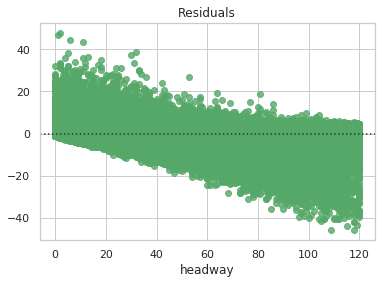

In [14]:
sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
sns.residplot(test_Y, pred, color="g").set_title('Residuals')

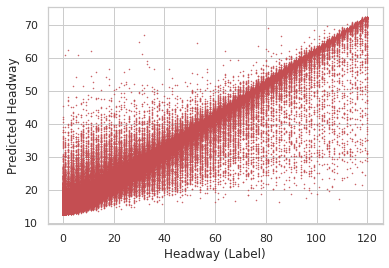

In [15]:
# Print all error to see if there is standard or some big outliers
plt.figure()
plt.plot(test_Y, pred, 'ro', ms=0.5)
plt.xlabel('Headway (Label)')
plt.ylabel('Predicted Headway')
plt.show()

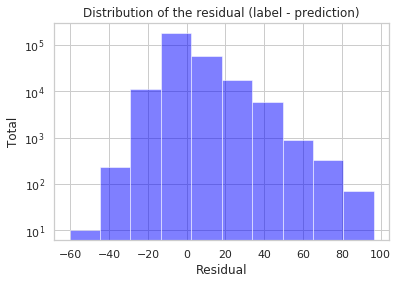

In [16]:
diff = test_Y - np.array(pred).flatten()
num_bins = 10
plt.hist(diff, num_bins, facecolor='blue', alpha=0.5, log=True)
plt.xlabel('Residual')
plt.ylabel('Total')
plt.title('Distribution of the residual (label - prediction)')
plt.show()

### Majoriting Voting: Random Forest, Gradient Boosting (or KNN), XGBoost

In [14]:
rf = joblib.load('../RandomForest/Saved_RF_100_5_08_BB_class_1000.pkl')
# gb = joblib.load('../GradientBoosting/Saved_GB_BB_class.pkl') 
# knn = joblib.load('../KNN/Saved_KNN_5_distance.pkl')
catBoost = joblib.load('../CatBoost/Saved_CatBoost_BB_class_1000.pkl')
xgb = joblib.load('../XGBoost/Saved_XGB_BB_class_1000.pkl')

In [15]:
rf_pred = rf.predict(test_X) #train_X
# gb_pred = gb.predict(test_X)
# knn_pred = knn.predict(test_X)
cat_pred = catBoost.predict(test_X)
xgb_pred = xgb.predict(test_X)

In [16]:
final_predictions = []

for i in range(0, len(rf_pred)):
    temp_preds = []
    temp_preds.append(rf_pred[i])
    temp_preds.append(cat_pred[i])
    # temp_preds.append(knn_pred[i])
#     temp_preds.append(gb_pred[i])
    temp_preds.append(xgb_pred[i])
    
    final_predictions.append(
        max(temp_preds,key=temp_preds.count)
    )

In [ ]:
accuracy = accuracy_score(test_Y, final_predictions)
precision = precision_score(test_Y, final_predictions)
recall = recall_score(test_Y, final_predictions)
f_measure = f1_score(test_Y, final_predictions)

In [8]:
#Random Forest, KNN, CatBoost, XGBoost
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9512401972588971
Precision: 0.9091453275690057
Recall: 0.7086606008761698
F-measure: 0.796480545398925


In [ ]:
#Random Forest, CatBoost, XGBoost - 1000, to compare with rvm
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

In [9]:
#Random Forest, CatBoost, XGBoost - 3000, to compare with rvm
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9733333333333334
Precision: 0.9634146341463414
Recall: 0.8586956521739131
F-measure: 0.9080459770114943


In [16]:
#Random Forest, CatBoost, XGBoost - all data
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9518439797994604
Precision: 0.9075627487746307
Recall: 0.7151670684604816
F-measure: 0.7999594061702621


In [11]:
#Random Forest, KNN, XGBoost
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9497394660887106
Precision: 0.9118849666076053
Recall: 0.6937294242683464
F-measure: 0.7879867500920132


In [10]:
#Random Forest, Gradient Boosting, XGBoost
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9403023100789804
Precision: 0.9032754864397866
Recall: 0.6233507011950126
F-measure: 0.7376493504501603


### Stacking

#### 1. rf>xgboost>knn(final) 1 day
Accuracy: 0.9653001359376118, 0.9996422694426558, 0.9997853616655935, 0.9995707233311869, 0.9997138155541246, 0.9997853616655935
Precision: 0.9405241935483871, 0.42857142857142855, 1.0, 1.0, 0.75, 1.0
Recall: 0.6865342163355408, 0.75, 0.5, 0.25, 0.5, 0.4
F-measure: 0.7937048064653338, 0.5454545454545454, 0.6666666666666666, 0.4, 0.6, 0.5714285714285715

In [5]:
rf = joblib.load('../RandomForest/Saved_RF_100_5_08_BB_class.pkl')
rf_pred = rf.predict(train_X) #train_X

rf_pred

/home/veruska/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.21.3 when using version 0.22.1. 

array([0., 1., 0., ..., 0., 0., 0.])

In [6]:
train_X['rf'] = rf_pred

In [6]:
train_X['rf'].head(5)

223035     0.0
704879     1.0
1412767    0.0
486302     0.0
203578     1.0
Name: rf, dtype: float64

In [8]:
rf_xgboost_stac = XGBClassifier(
     learning_rate =0.1,
     n_estimators=120, 
     max_depth=50,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=-1,
     scale_pos_weight=1,
     seed=23)

rf_xgboost_stac.fit(train_X, train_Y)
xgb_pred = rf_xgboost_stac.predict(train_X)

/home/veruska/.local/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MemoryError: Unable to allocate 3.59 GiB for an array with shape (421, 1146106) and data type float64

In [ ]:
train_X['xgboost'] = xgb_pred

In [10]:
rf_xgboost_knn_final = KNeighborsClassifier(n_jobs=-1)

rf_xgboost_knn_final.fit(train_X, train_Y)

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
rf_pred_test = rf.predict(test_X)
test_X['rf'] = rf_pred_test
xgb_pred_test = rf_xgboost_stac.predict(test_X)
test_X['xgboost'] = xgb_pred_test

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
pred_array = rf_xgboost_knn_final.predict(test_X)
pred_array

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

In [14]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9863346927094513
Precision: 0.9850498338870431
Recall: 0.8727005150846211
F-measure: 0.925477955520874


In [16]:
# Saving a pickle file for the model
joblib.dump(rf_xgboost_knn_final, 'Saved_rf_xgboost_knn_final.pkl')

['Saved_rf_xgboost_knn_final.pkl']

#### 1.1. rf>xgboost>catboost

In [11]:
rf_xgboost_cb_final = model = CatBoostClassifier(
    custom_loss=['Accuracy', 'Precision', 'Recall', 'F1'],
    iterations=10000,
    learning_rate=0.9,
    random_seed=42,
    depth=8,
    l2_leaf_reg=5,
    logging_level='Silent'
)

rf_xgboost_cb_final.fit(train_X, train_Y)


rf_pred_test = rf.predict(test_X)
test_X['rf'] = rf_pred_test
xgb_pred_test = rf_xgboost_stac.predict(test_X)
test_X['xgboost'] = xgb_pred_test


pred_array = rf_xgboost_cb_final.predict(test_X)
pred_array

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([0., 1., 0., ..., 0., 0., 0.])

In [12]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9517846485671507
Precision: 0.9034213098729228
Recall: 0.7187184073411619
F-measure: 0.8005543765429425


#### 1.2. rf>xgboost>knn>catboost

In [9]:
rf_xgboost_knn = KNeighborsClassifier(n_jobs=-1)
rf_xgboost_knn.fit(train_X, train_Y)
knn_pred = rf_xgboost_knn.predict(train_X)
train_X['knn'] = knn_pred


rf_xgboost_knn_cb_final = model = CatBoostClassifier(
    custom_loss=['Accuracy', 'Precision', 'Recall', 'F1'],
    iterations=10000,
    learning_rate=0.9,
    random_seed=42,
    depth=8,
    l2_leaf_reg=5,
    logging_level='Silent'
)

rf_xgboost_knn_cb_final.fit(train_X, train_Y)

rf_pred_test = rf.predict(test_X)
test_X['rf'] = rf_pred_test
xgb_pred_test = rf_xgboost_stac.predict(test_X)
test_X['xgboost'] = xgb_pred_test
knn_pred_test = rf_xgboost_knn.predict(test_X)
test_X['knn'] = knn_pred_test

pred_array = rf_xgboost_knn_cb_final.predict(test_X)
pred_array

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/hom

array([0., 1., 0., ..., 0., 0., 0.])

In [10]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9517811584946619
Precision: 0.9033130273316611
Recall: 0.7187961738859943
F-measure: 0.8005600946964228


#### 1.3. rf>xgboost>catboost>knn

In [9]:
rf_xgboost_cb = model = CatBoostClassifier(
    custom_loss=['Accuracy', 'Precision', 'Recall', 'F1'],
    iterations=10000,
    learning_rate=0.9,
    random_seed=42,
    depth=8,
    l2_leaf_reg=5,
    logging_level='Silent'
)
rf_xgboost_cb.fit(train_X, train_Y)
cb_pred = rf_xgboost_cb.predict(train_X)
train_X['cb'] = cb_pred


rf_xgboost_cb_knn = KNeighborsClassifier(n_jobs=-1)
rf_xgboost_cb_knn.fit(train_X, train_Y)


rf_pred_test = rf.predict(test_X)
test_X['rf'] = rf_pred_test
xgb_pred_test = rf_xgboost_stac.predict(test_X)
test_X['xgboost'] = xgb_pred_test
cb_pred_test = rf_xgboost_cb.predict(test_X)
test_X['cb'] = cb_pred_test

pred_array = rf_xgboost_cb_knn.predict(test_X)
pred_array

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

array([0., 1., 0., ..., 0., 0., 0.])

In [10]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9515857144352888
Precision: 0.9035577771243752
Recall: 0.7169297768100164
F-measure: 0.7994970080652156


#### 2. rf>knn>xgboost (MELHOR NA MENOR BASE)


In [4]:
rf = joblib.load('../RandomForest/Saved_RF_100_5_08_BB_class.pkl')
rf_pred = rf.predict(train_X) #train_X

rf_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [7]:
train_X['rf'] = rf_pred

rf_knn = KNeighborsClassifier(n_jobs=-1)
rf_knn.fit(train_X, train_Y)
rf_knn_pred = rf_knn.predict(train_X)
train_X['knn'] = rf_knn_pred
#testes: diminuir n=100 e del preds

rf_knn_xgboost = XGBClassifier(
     learning_rate =0.1,
     n_estimators=120, 
     max_depth=50,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=-1,
     scale_pos_weight=1,
     seed=23)
rf_knn_xgboost.fit(train_X, train_Y)
rf_knn_xgboost_pred = rf_knn_xgboost.predict(train_X)


rf_pred_test = rf.predict(test_X)
test_X['rf'] = rf_pred_test
rf_knn_pred_test = rf_knn.predict(test_X)
test_X['knn'] = rf_knn_pred_test

pred_array = rf_knn_xgboost.predict(test_X)
pred_array

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/home/veruska/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MemoryError: Unable to allocate array with shape (483656732,) and data type float32

In [ ]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

In [ ]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

In [10]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure)) #1day

Accuracy: 0.9881948916076412
Precision: 0.9830097087378641
Recall: 0.8940397350993378
F-measure: 0.9364161849710982


#### 2.1 rf>catboost>xgboost

In [5]:
train_X['rf'] = rf_pred

rf_cb = CatBoostClassifier(
    custom_loss=['Accuracy', 'Precision', 'Recall', 'F1'],
    iterations=10000,
    learning_rate=0.9,
    random_seed=42,
    depth=8,
    l2_leaf_reg=5,
    logging_level='Silent'
)
rf_cb.fit(train_X, train_Y)
rf_cb_pred = rf_cb.predict(train_X)
train_X['cb'] = rf_cb_pred
#testes: diminuir n=100 e del preds

rf_cb_xgboost = XGBClassifier(
     learning_rate =0.1,
     n_estimators=120, 
     max_depth=50,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=-1,
     scale_pos_weight=1,
     seed=23)
rf_cb_xgboost.fit(train_X, train_Y)
rf_cb_xgboost_pred = rf_cb_xgboost.predict(train_X)


rf_pred_test = rf.predict(test_X)
test_X['rf'] = rf_pred_test
rf_cb_pred_test = rf_cb.predict(test_X)
test_X['cb'] = rf_cb_pred_test

pred_array = rf_cb_xgboost.predict(test_X)
pred_array

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/veruska/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

array([0., 1., 0., ..., 0., 0., 0.])

In [6]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9514740321156471
Precision: 0.8999254384543067
Recall: 0.7195997615159292
F-measure: 0.799723438580318


#### 3. knn>xgboost>rf

In [5]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(train_X, train_Y)
knn_pred = knn.predict(train_X)
train_X['knn'] = knn_pred


knn_xgboost = XGBClassifier(
     learning_rate =0.1,
     n_estimators=120, 
     max_depth=50,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=-1,
     scale_pos_weight=1,
     seed=23)
knn_xgboost.fit(train_X, train_Y)
knn_xgboost_pred = knn_xgboost.predict(train_X)
train_X['xgboost'] = knn_xgboost_pred


knn_xgboost_rf = RandomForestClassifier(n_estimators=100, min_samples_split=5,
                           max_features=0.8, n_jobs=-1)
knn_xgboost_rf.fit(train_X, train_Y)
knn_xgboost_rf_pred = knn_xgboost_rf.predict(train_X)


knn_pred_test = knn.predict(test_X)
test_X['knn'] = knn_pred_test
knn_xgboost_pred_test = knn_xgboost.predict(test_X)
test_X['xgboost'] = knn_xgboost_pred_test

pred_array = knn_xgboost_rf.predict(test_X)
pred_array

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

In [7]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9580024325677899
Precision: 0.8641509433962264
Recall: 0.6740250183958794
F-measure: 0.7573377428689542


####  4. xgboost>rf>knn

In [4]:
xgboost = XGBClassifier(
     learning_rate =0.1,
     n_estimators=120, 
     max_depth=50,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=-1,
     scale_pos_weight=1,
     seed=23)
xgboost.fit(train_X, train_Y)
xgboost_pred = xgboost.predict(train_X)
train_X['xgboost'] = xgboost_pred


xgboost_rf = RandomForestClassifier(n_estimators=100, min_samples_split=5,
                           max_features=0.8, n_jobs=-1)
xgboost_rf.fit(train_X, train_Y)
xgboost_rf_pred = xgboost_rf.predict(train_X)
train_X['rf'] = xgboost_rf_pred


xgboost_rf_knn = KNeighborsClassifier(n_jobs=-1)
xgboost_rf_knn.fit(train_X, train_Y)
xgboost_rf_knn_pred = xgboost_rf_knn.predict(train_X)


xgboost_pred_test = xgboost.predict(test_X)
test_X['xgboost'] = xgboost_pred_test
xgboost_rf_pred_test = xgboost_rf.predict(test_X)
test_X['rf'] = xgboost_rf_pred_test

pred_array = xgboost_rf_knn.predict(test_X)
pred_array

/home/veruska/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/veruska/.local/lib/python3.6/site-packages/

array([0., 0., 0., ..., 0., 0., 0.])

In [5]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

In [6]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9649424053802675
Precision: 0.9263984298331698
Recall: 0.6946284032376747
F-measure: 0.7939444911690496


In [18]:
#todos 1.
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9508562892851284
Precision: 0.9031334342702916
Recall: 0.711278741218861
F-measure: 0.7958062036862483


#### 4.1 xgboost>rf>catboost

In [ ]:
xgboost = XGBClassifier(
     learning_rate =0.1,
     n_estimators=120, 
     max_depth=50,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=-1,
     scale_pos_weight=1,
     seed=23)
xgboost.fit(train_X, train_Y)
xgboost_pred = xgboost.predict(train_X)
train_X['xgboost'] = xgboost_pred


xgboost_rf = RandomForestClassifier(n_estimators=100, min_samples_split=5,
                           max_features=0.8, n_jobs=-1)
xgboost_rf.fit(train_X, train_Y)
xgboost_rf_pred = xgboost_rf.predict(train_X)
train_X['rf'] = xgboost_rf_pred


xgboost_rf_cb = CatBoostClassifier(
    custom_loss=['Accuracy', 'Precision', 'Recall', 'F1'],
    iterations=10000,
    learning_rate=0.9,
    random_seed=42,
    depth=8,
    l2_leaf_reg=5,
    logging_level='Silent'
)
xgboost_rf_cb.fit(train_X, train_Y)
xgboost_rf_cb_pred = xgboost_rf_cb.predict(train_X)


xgboost_pred_test = xgboost.predict(test_X)
test_X['xgboost'] = xgboost_pred_test
xgboost_rf_pred_test = xgboost_rf.predict(test_X)
test_X['rf'] = xgboost_rf_pred_test

pred_array = xgboost_rf_cb.predict(test_X)
pred_array

In [ ]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

In [ ]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

#### 4.2 xgboost>rf>catboost>knn

In [ ]:
xgboost = XGBClassifier(
     learning_rate =0.1,
     n_estimators=120, 
     max_depth=50,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=-1,
     scale_pos_weight=1,
     seed=23)
xgboost.fit(train_X, train_Y)
xgboost_pred = xgboost.predict(train_X)
train_X['xgboost'] = xgboost_pred


xgboost_rf = RandomForestClassifier(n_estimators=100, min_samples_split=5,
                           max_features=0.8, n_jobs=-1)
xgboost_rf.fit(train_X, train_Y)
xgboost_rf_pred = xgboost_rf.predict(train_X)
train_X['rf'] = xgboost_rf_pred


xgboost_rf_cb = CatBoostClassifier(
    custom_loss=['Accuracy', 'Precision', 'Recall', 'F1'],
    iterations=10000,
    learning_rate=0.9,
    random_seed=42,
    depth=8,
    l2_leaf_reg=5,
    logging_level='Silent'
)
xgboost_rf_cb.fit(train_X, train_Y)
xgboost_rf_cb_pred = xgboost_rf_cb.predict(train_X)
train_X['cat'] = xgboost_rf_cb_pred


xgboost_rf_cb_knn = KNeighborsClassifier(n_jobs=-1)
xgboost_rf_cb_knn.fit(train_X, train_Y)
xgboost_rf_knn_pred = xgboost_rf_cb_knn.predict(train_X)


xgboost_pred_test = xgboost.predict(test_X)
test_X['xgboost'] = xgboost_pred_test
xgboost_rf_pred_test = xgboost_rf.predict(test_X)
test_X['rf'] = xgboost_rf_pred_test
xgboost_rf_cb_pred_test = xgboost_rf_cb.predict(test_X)
test_X['cat'] = xgboost_rf_cb_pred_test

pred_array = xgboost_rf_cb_knn.predict(test_X)
pred_array

In [ ]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

In [ ]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

### Boosting

In [ ]:
# check predictions and add weights
def checkPredictions(pred):
    weights = []
    for i in range(0, len(pred)):
        if (pred[i] == train_Y.values[i][0]): # prediction correct
            weights.append(0.1)
        else:
            if (pred[i] == 0.0): # false negative
                weights.append(0.5)
            else: # false positive
                weights.append(0.4)
                
    return weights

#### 1. rf>xgboost>knn>catboost

In [ ]:
xgboost = XGBClassifier(
     learning_rate =0.1,
     n_estimators=120, 
     max_depth=50,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=-1,
     scale_pos_weight=1,
     seed=23)

xgboost.fit(train_X, train_Y)
xgb_pred = xgboost.predict(train_X)

train_X['xgboost'] = xgb_pred

In [ ]:
xgb_rf = RandomForestClassifier(n_estimators=100, min_samples_split=5,
                                            max_features=0.8, n_jobs=-1)
xgb_rf.fit(train_X, train_Y, checkPredictions(xgb_pred))
rf_pred = xgb_rf.predict(train_X)

train_X['rf'] = rf_pred

In [ ]:
xgb_rf_cb = model = CatBoostClassifier(
    custom_loss=['Accuracy', 'Precision', 'Recall', 'F1'],
    iterations=10000,
    learning_rate=0.9,
    random_seed=42,
    depth=8,
    l2_leaf_reg=5,
    logging_level='Silent'
)

xgb_rf_cb.fit(train_X, train_Y, sample_weight=checkPredictions(rf_pred))
cat_pred = xgb_rf_cb.predict(train_X)

train_X['cat'] = cat_pred

In [ ]:
xgb_rf_cb_knn = KNeighborsClassifier(n_jobs=-1)
xgb_rf_cb_knn.fit(train_X, train_Y)

In [ ]:
xgboost_pred_test = xgboost.predict(test_X)
test_X['xgboost'] = xgboost_pred_test

xgb_rf_pred_test = xgb_rf.predict(test_X)
test_X['rf'] = xgb_rf_pred_test

xgb_rf_cb_pred_test = xgb_rf_cb.predict(test_X)
test_X['cat'] = xgb_rf_cb_pred_test

pred_array = xgb_rf_cb_knn.predict(test_X)
#pred_array = xgb_rf_cb.predict(test_X) #sem knn
pred_array

In [ ]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

In [ ]:
# boosting: xgb > rf (peso) > cat (peso)
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure)) #0.79

In [ ]:
# boosting: xgb > rf (peso) > cat (peso) > knn
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure)) #0.79

In [ ]:
# boosting: rf (sem peso) > xgb (com peso, kernel dead) > knn (n tem peso) > cat (com peso)
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure)) #0.8